## Paso 1:


(1999, 205) (205,) (205, 205)
(1999,)


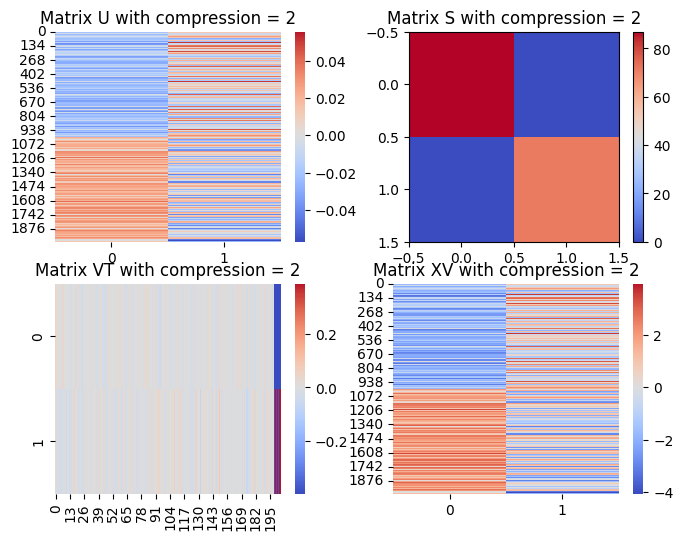

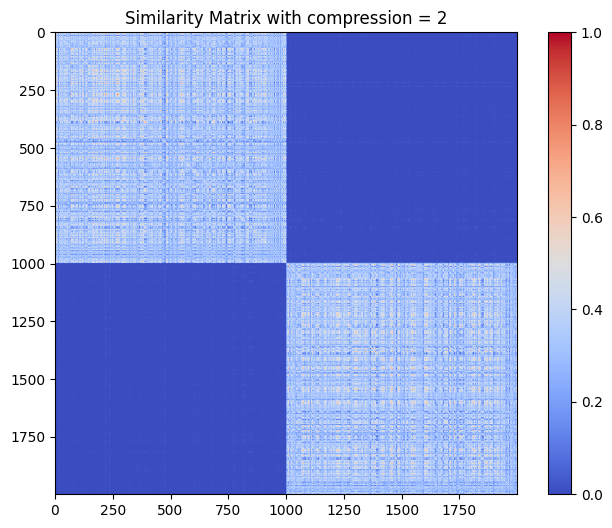

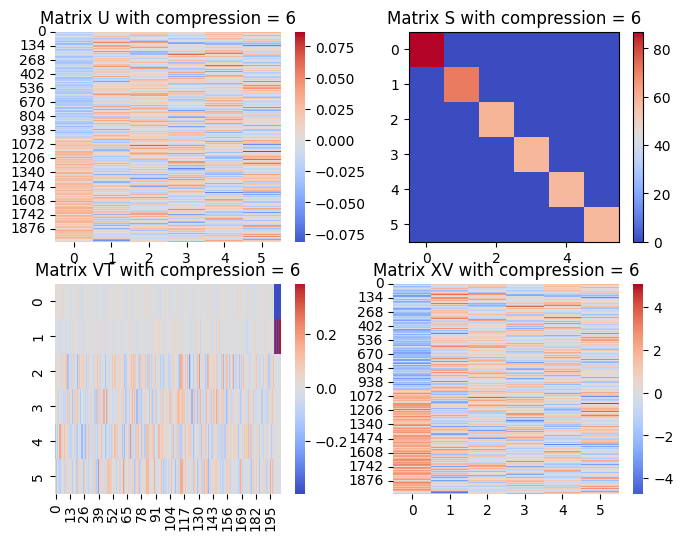

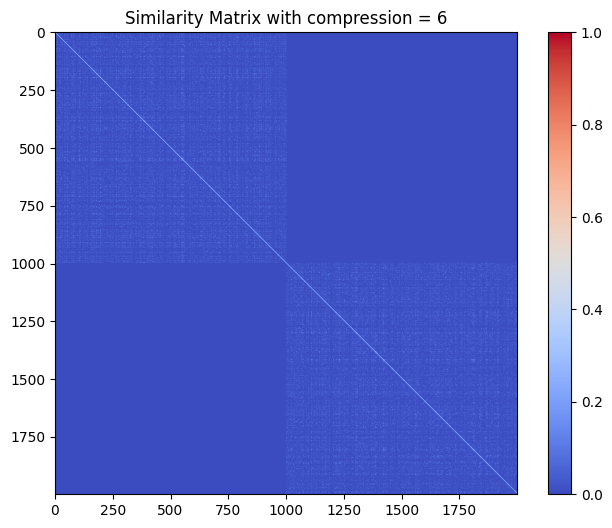

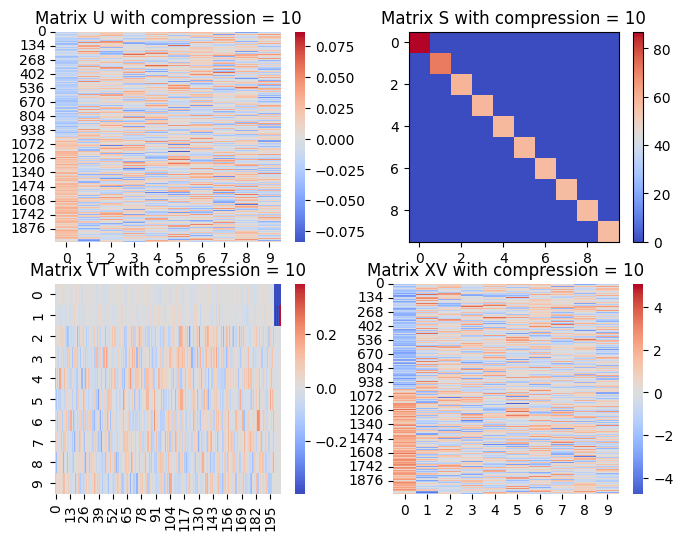

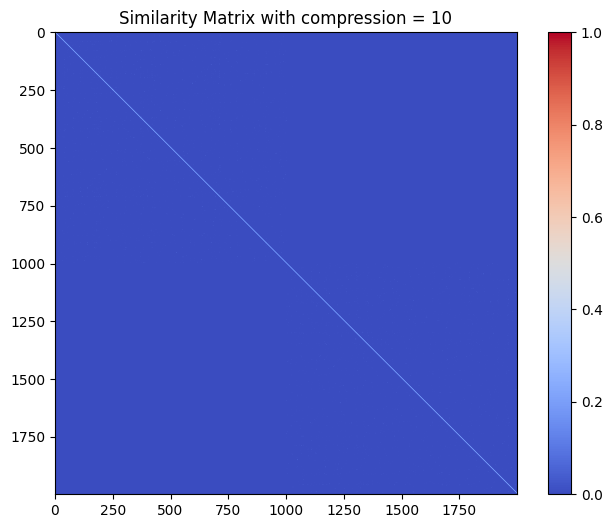

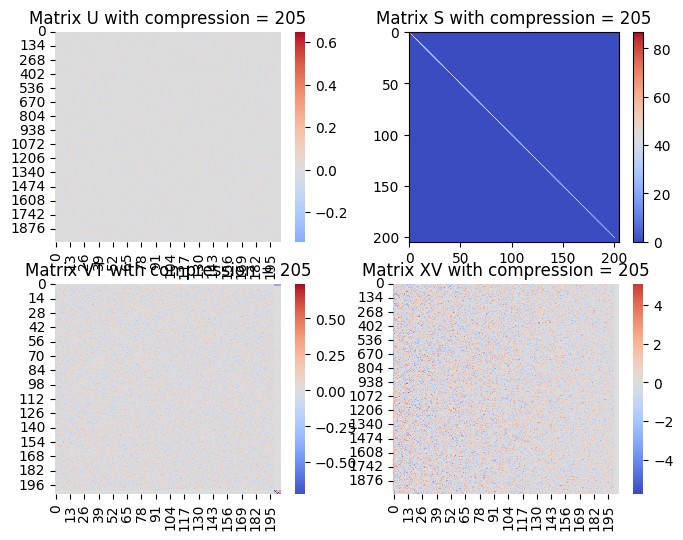

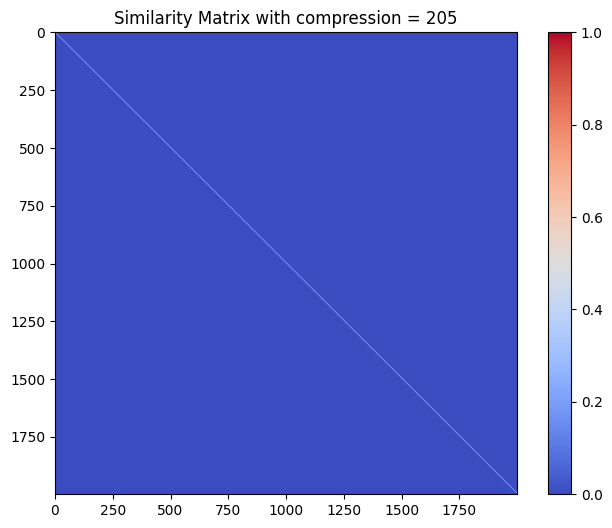

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt

def similarity_matrix(X, sigma):
    distances = np.linalg.norm(X)
    k = np.exp(-distances**2/(2*sigma**2))
    return k


compression_values = [2, 6, 10]
j = 0
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('dataset01.csv')

# Remove the first row (column names)
df = df.iloc[1:]

# Remove the first column (row numbers)
df = df.iloc[:, 1:]

# Convert the remaining columns to float
df = df.astype(float)

# Convert the DataFrame to a numpy array
X = df.values
compression_values += [X.shape[1]]

U,S,VT = np.linalg.svd(X, full_matrices=False)
print(U.shape, S.shape, VT.shape)
Z = U@S
print(Z.shape)

def similarity_matrix(X, sigma):
    distances = squareform(pdist(X, 'euclidean'))
    k = np.exp(-distances**2/(2*sigma**2))
    return k

for compression in compression_values:
    
    #Matrix U
    U_hat = U[:,:compression]
    plt.figure(figsize=(8, 6))
    plt.subplot(2,2,1)
    #Heatmap of matrixU
    sns.heatmap(U_hat, cmap='coolwarm', center=0)
    plt.title('Matrix U with compression = ' + str(compression))
    

    #Matrix S
    S_hat = np.diag(S[:compression])
    #Plot the matrix S
    # plt.figure(figsize=(8, 6))
    plt.subplot(2,2,2)
    plt.imshow(S_hat, cmap='coolwarm')
    plt.colorbar()
    plt.title('Matrix S with compression = ' + str(compression))
    
    plt.subplot(2,2,3)
    # VT matrix
    VT_hat = VT[:compression, :]
    # Heatmap of matrix VT
    sns.heatmap(VT_hat, cmap='coolwarm', center=0)
    plt.title('Matrix VT with compression = ' + str(compression))
    # plt.show()
    plt.subplot(2,2,4)
    #Matrix XV 
    XV_hat = U_hat @ S_hat 
    # Heatmap of matrix XV
    sns.heatmap(XV_hat, cmap='coolwarm', center=0)
    plt.title('Matrix XV with compression = ' + str(compression))
    plt.show()


    sigma = 1.0
    
    # Calculate the similarity matrix
    similarity = similarity_matrix(XV_hat, sigma)
    
    # Display the similarity matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(similarity, cmap='coolwarm')
    plt.colorbar()
    plt.title('Similarity Matrix with compression = ' + str(compression))
    plt.show()

    





## Paso 2: Identificación de dimensiones más representativas

## Paso 3: Paso 3: Modelado lineal y predicción